In [1]:
import numpy as np
import math
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import datetime

In [2]:
def c(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

In [3]:
def check_hilbert(n, k, d):
    total_sum = 0
    for i in range(d - 1):
        total_sum += c(n - 1, i)
    return total_sum < 2 ** (n - k)

In [4]:
def find_hilbert(n, k):
    cur_d = 1
    while True:
        if not check_hilbert(n, k, cur_d):
            return cur_d - 1
        else:
            cur_d += 1

In [5]:
def generate_binary_vectors(vect_len):
    def get_all_vectors(vector_len, cur_vectors):
        if len(cur_vectors[0]) == vector_len: # если вектора уже нужного размера, возвращаем их
            return cur_vectors
        
        new_vectors = []
        for cur_vector in cur_vectors:
            cur_vector_zero = cur_vector[:]
            cur_vector_zero.append(0)

            cur_vector_one = cur_vector[:]
            cur_vector_one.append(1)
            new_vectors.append(cur_vector_zero)
            new_vectors.append(cur_vector_one)
        return get_all_vectors(vector_len, new_vectors)
    
    answer = get_all_vectors(vect_len, [[]])
    assert len(answer) == 2 ** vect_len
    
    return set([tuple(x) for x in answer])

In [6]:
def get_first(s):
    for x in s:
        return x

In [7]:
def build_hilbert(n, k):
    r = n - k
    # будем составлять проверочную матрицу размера r строк на n столбцов
    # каждые её d - 1 столбцов будут ЛНЗ
    H = [[None for _ in range(n)] for _ in range(r)]
    # находим границу Варшамова-Гилберта
    d = find_hilbert(n, k)
    
    # получаем все потенциальные вектор-столбцы матрицы H
    possible_vects = generate_binary_vectors(r)
    
    # составляем текущий столбец матрицы H
    for cur_num in range(n):
        # получаем все линейные комбинации, состоящие из не более чем d - 2 векторов-столбцов матрицы H 
        linear_coeffs = filter(
            lambda cs: sum(cs) <= d - 2,
            generate_binary_vectors(cur_num)
        )
        # перебираем коэффициенты текущей линейной комбинации
        for cur_cs in linear_coeffs:
            # составляем текущую линейную комбинацию
            cur_linear_combination = [0 for _ in range(r)]
            for i in range(cur_num):
                cur_c = cur_cs[i]
                if cur_c == 1:
                    # добавляем в текущую линейную комбинацию вектор-столбец матрицы H, который в неё включается
                    for j in range(r):
                        cur_linear_combination[j] = (cur_linear_combination[j] + H[j][i]) % 2
            # исключаем линейную комбинацию из списка векторов-кандидатов
            found_vect = tuple(cur_linear_combination)
            if found_vect in possible_vects:
                possible_vects.remove(found_vect)
        
        # берём случайный вектор, который не был исключён на предыдущих шагах
        # делаем его текущим вектор-стобцом матрицы H
        vect = get_first(possible_vects)
        possible_vects.remove(vect)
        
        for i in range(r):
            H[i][cur_num] = vect[i]
    return H, d

In [8]:
times = []
ns = list(range(5, 25))

for n in tqdm_notebook(ns):
    start_time = datetime.datetime.now()
    k = n // 2
    H, d = build_hilbert(n, k)
    timedelta = (datetime.datetime.now() - start_time).seconds
    times.append(timedelta)

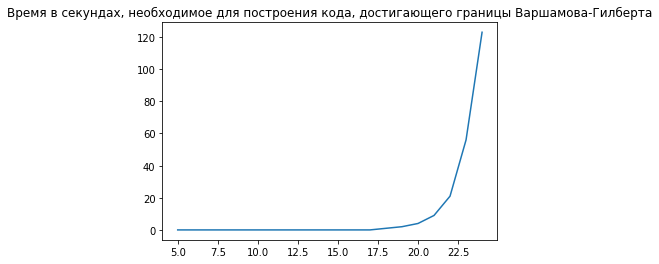

In [11]:
plt.plot(ns, times)
plt.title('Время в секундах, необходимое для построения кода, достигающего границы Варшамова-Гилберта')
plt.show()